<a href="https://colab.research.google.com/github/blackdevil0071/Prediction-using-Supervised-ML/blob/main/Salary_Prediction_Project_using_Machine_Learning%5BLinear_regression%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Necessary Libraries.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Load / Read CSV file.**

In [5]:
data = pd.read_excel('/content/2708135-Salary.xlsx')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
data.describe(include = 'all')

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [7]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

Visualise the Data .

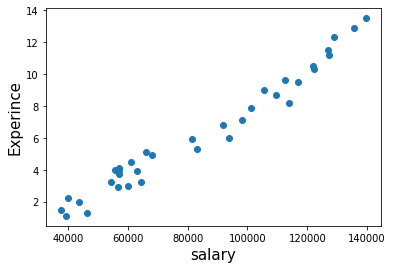

In [15]:
plt.scatter(data['Salary'],data['YearsExperience'])
plt.xlabel('salary',fontsize=15)
plt.ylabel('Experince',fontsize=15)
plt.show()

**import sklearn library for train_test_split**

In [16]:
from sklearn.model_selection import train_test_split
X= data.drop('Salary',axis=1)

In [17]:
y = data['Salary']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Fitting the model**

In [19]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()
L.fit(X_train,y_train)

LinearRegression()

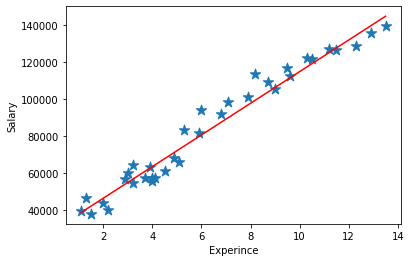

In [24]:
line = L.coef_*X+L.intercept_
plt.scatter(X,y,marker="*",s=120)
plt.plot(X,line,color='r')
plt.xlabel('Experince')
plt.ylabel('Salary')
plt.show()

**From the above graph we can see that there is a linear Relationship Between the Salary and years of Experince**

In [25]:
print(X_test)
y_pred = L.predict(X_test)
y_pred

    YearsExperience
26              9.5
13              4.1
24              8.7
21              7.1
15              4.9
29             10.5
19              6.0


array([110576.91706292,  64251.57268882, 103713.90308157,  89987.87511888,
        71114.58667017, 119155.68453961,  80551.23089452])

In [26]:
df = pd.DataFrame({'actual':y_test,'predicted':y_pred})
df

,actual,predicted
26,116969,110576.917063
13,57081,64251.572689
24,109431,103713.903082
21,98273,89987.875119
15,67938,71114.586670
29,121872,119155.684540
19,93940,80551.230895


In [27]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.8914234140042779

**Our Model workd 89% good for the given Dataset.**